In [223]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imshow, imsave
from skimage import data, img_as_float, metrics, restoration, filters, morphology as morph

# https://sci-hub.ru/https://www.sciencedirect.com/science/article/abs/pii/016727899290242F
# https://eeweb.engineering.nyu.edu/iselesni/lecture_notes/TVDmm/
# https://www.youtube.com/watch?v=6cRwZ19iiHo
# https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html


In [224]:
# skimage.io некорректно работает с сохранением изображения с low_contrast, даже если флаг check_contrast=False
# https://github.com/scikit-image/scikit-image/issues/3819
# тем не менее, библиотека позволяет их выводить на экран, поэтому для данной лабораторной работы был использован
# функционал Jupiter Notebook

emap = lambda f, xs: [f(x) for x in xs]
unzip = lambda xs: [[a for a, _ in xs], [b for _, b in xs]]

show1   = lambda pic: (lambda ax: ax.axis('off') and ax.imshow(pic, cmap='gray'))(plt.subplots()[1])
float64 = lambda x: x.astype(np.float64) / 255.0
loadf64 = lambda x: float64(imread(x))

psnr    = metrics.peak_signal_noise_ratio
compare = lambda fn, o, n, f: {'Ориг/Шум': fn(o, n), 'Шум/Фильтр': fn(n, f), 'Ориг/Фильтр': fn(o, f)}
psnr_ssim1 = lambda o, n, f: {'': compare(psnr, o, n, f)}
psnr_ssim = lambda o, n, f: pd.DataFrame(psnr_ssim1(o, n, f))

def show(pics, title=None):
    cols, rows = 2, (len(pics) // 2) + (len(pics) % 2)
    fig, axs = plt.subplots(rows, cols, squeeze=True, constrained_layout=True)
    show1 = lambda pic, ax: ax.axis('off') and ax.imshow(pic, cmap='gray')
    [show1(pic, ax) for pic, ax in zip(pics, axs.flat)]

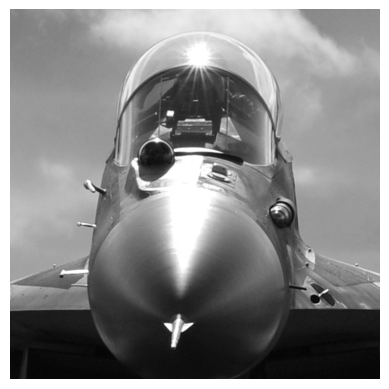

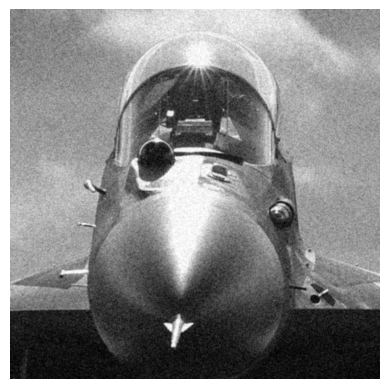

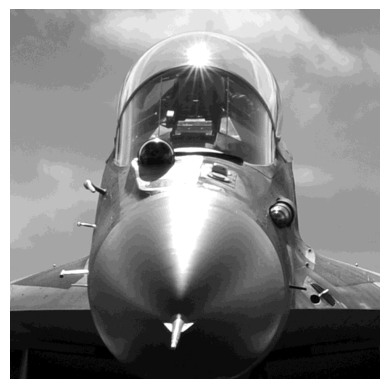

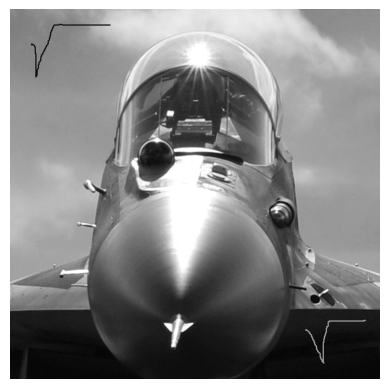

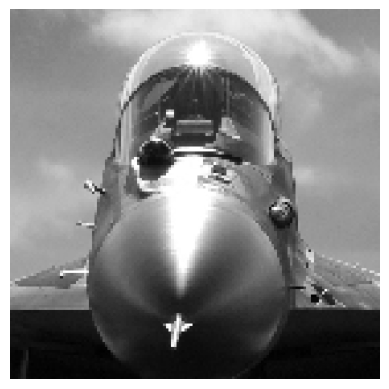

In [225]:
IMG_ARR = emap(loadf64, ['img/init/test2_0.jpg', 'img/dist/1/test2_1.jpg', 'img/dist/2/test2_2.jpg', 'img/dist/3/test2_3.jpg', 'img/dist/4/test2_4.jpg'])

INIT_IMG, STAT, POST, SQRT, PIXL = IMG_ARR
emap(show1, IMG_ARR)

,
Ориг/Фильтр,31.899871
Ориг/Шум,27.984076
Шум/Фильтр,28.855428


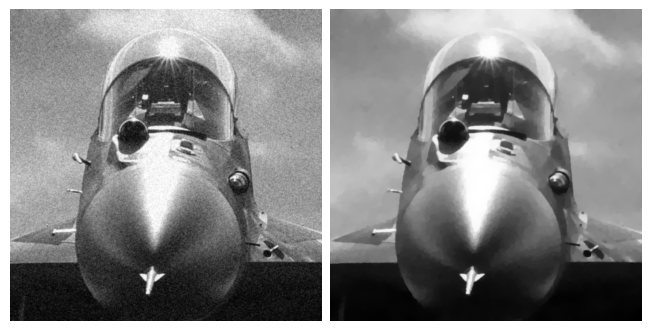

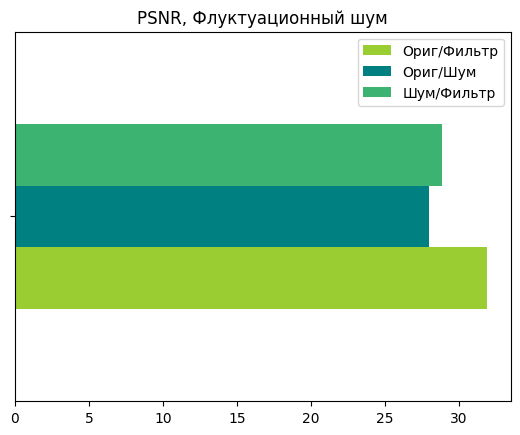

In [226]:
FILTERED_1 = restoration.denoise_tv_chambolle(stat, 0.08, eps=0.00000015)
show([STAT, FILTERED_1])
psnr_ssim(INIT_IMG, STAT, FILTERED_1).T.plot.barh(title='PSNR, Флуктуационный шум', color=['yellowgreen', 'teal', 'mediumseagreen'])

def some_highlights(styler, min_color="red", max_color="green"):
    styler.highlight_min(color=min_color, axis=None)
    styler.highlight_max(color=max_color, axis=None)
    return styler

psnr_ssim(INIT_IMG, STAT, FILTERED_1).style.pipe(some_highlights)

,
Ориг/Фильтр,33.861471
Ориг/Шум,34.460640
Шум/Фильтр,33.897789


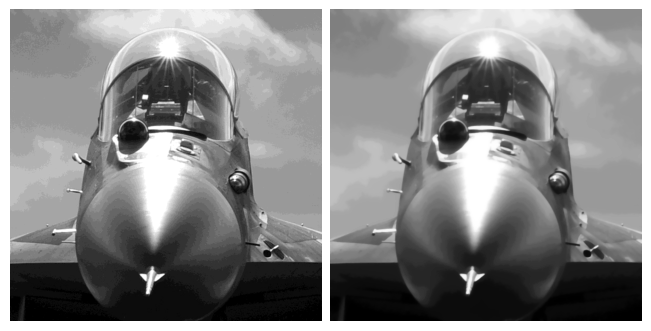

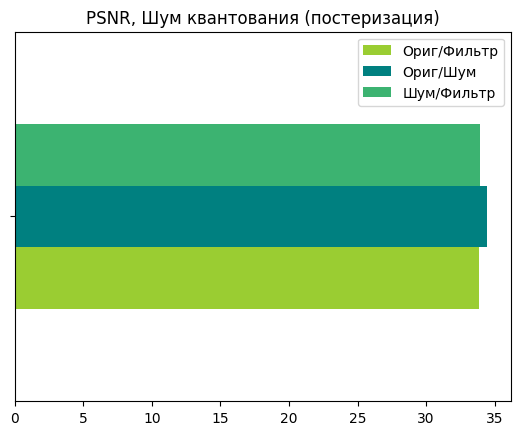

In [227]:
FILTERED_2 = restoration.denoise_tv_bregman(POST, 7.5, eps=0.000005, max_num_iter=5000)
show([POST, FILTERED_2])
psnr_ssim(INIT_IMG, POST, FILTERED_2).T.plot.barh(title='PSNR, Шум квантования (постеризация)', color=['yellowgreen', 'teal', 'mediumseagreen'])
psnr_ssim(INIT_IMG, POST, FILTERED_2).T.T.style.pipe(some_highlights)

,
Ориг/Фильтр,31.566024
Ориг/Шум,31.663784
Шум/Фильтр,28.665497


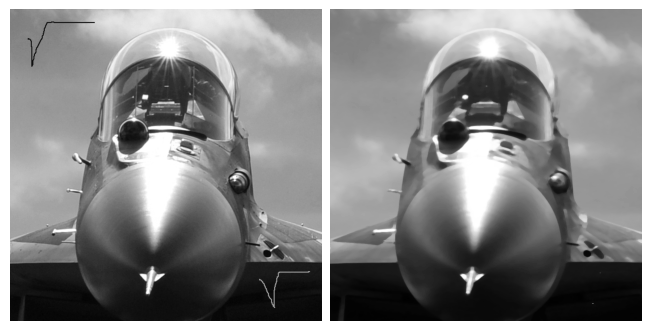

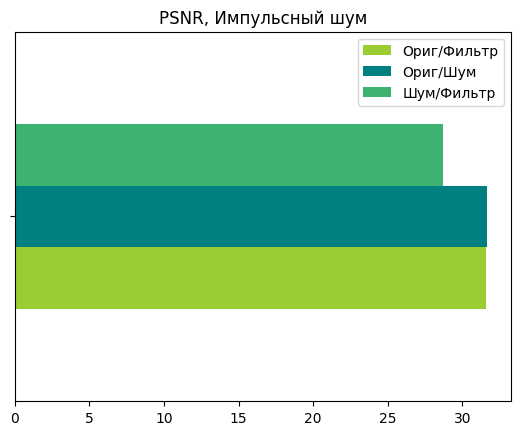

In [228]:
FILTERED_3 = filters.median(SQRT, morph.rectangle(5, 9))

show([SQRT, FILTERED_3])
psnr_ssim(INIT_IMG, SQRT, FILTERED_3).T.plot.barh(title='PSNR, Импульсный шум', color=['yellowgreen', 'teal', 'mediumseagreen'])
psnr_ssim(INIT_IMG, SQRT, FILTERED_3).T.T.style.pipe(some_highlights)

,
Ориг/Фильтр,25.512642
Ориг/Шум,26.637853
Шум/Фильтр,25.547059


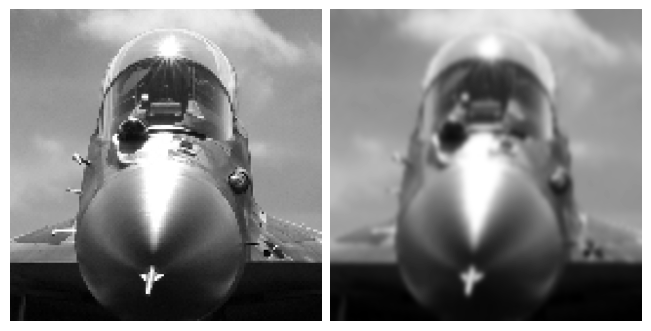

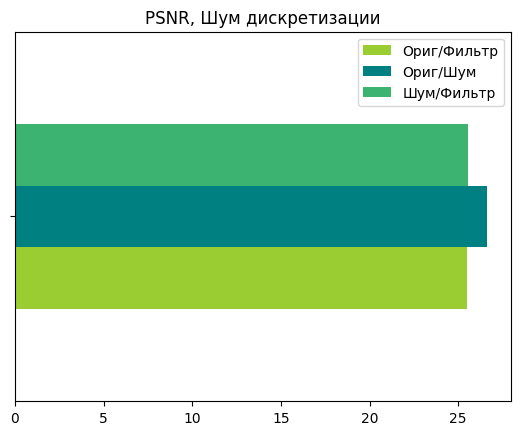

In [229]:
FILTERED_4 = filters.gaussian(PIXL, sigma=(5, 4))
show([PIXL, FILTERED_4])
psnr_ssim(INIT_IMG, PIXL, FILTERED_4).T.plot.barh(title='PSNR, Шум дискретизации', color=['yellowgreen', 'teal', 'mediumseagreen'])
psnr_ssim(INIT_IMG, PIXL, FILTERED_4).T.T.style.pipe(some_highlights)

In [230]:
pd.DataFrame({
    'Флуктуационный шум': psnr_ssim1(INIT_IMG, STAT, FILTERED_1),
    'Шум квантования': psnr_ssim1(INIT_IMG, POST, FILTERED_2),
    'Импульсный шум': psnr_ssim1(INIT_IMG, SQRT, FILTERED_3),
    'Шум дикретизации': psnr_ssim1(INIT_IMG, PIXL, FILTERED_4),
}).T

,
Флуктуационный шум,"{'Ориг/Шум': 27.98407570389561, 'Шум/Фильтр': ..."
Шум квантования,"{'Ориг/Шум': 34.46063962166437, 'Шум/Фильтр': ..."
Импульсный шум,"{'Ориг/Шум': 31.663783570732583, 'Шум/Фильтр':..."
Шум дикретизации,"{'Ориг/Шум': 26.63785321762312, 'Шум/Фильтр': ..."
